In [1]:
from PIL import Image
from glob import glob
from tqdm import tqdm
import numpy as np
import os
import pickle
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# load jpgs
def process_images(inpath, outpath, dim_tuple, extension, start=1):
    #open images
    for file in tqdm(glob(f'{inpath}*.{extension}')):
        with Image.open(file) as img:
            #rotate image
            rotated_images = rotate_images(img)
            
            # resize images
            resized = resizing(rotated_images, dim_tuple)
            
            #grayscale images
            gray_images = grayscale(resized)
            
            
            # save the images
            save_preprocessed_images(gray_images, outpath, extension, start)
            start += 2         
             
    return

In [8]:
# rotate images
def rotate_images(image):
    '''
    rotate_images(image):
    This function rotates an image on it's center 7 times (45, 90, 135, 180, 225, 270, and mirror image)
    Input:
        One image file
    Returns:
        A list of images containing the original image and the rotated one
    '''
    rotated_images = []
    
    chirl_image = image.transpose(Image.FLIP_LEFT_RIGHT)
    
    rotated_images.extend([image, chirl_image])  
    return rotated_images

In [4]:
def resizing(images, dim_tuple):
    '''
    resizing(images, dim_tuple):
    This function resizes a list of images
    Input:
        List of images
        Tuple containing the desired hight and the width
    Returns:
        List of resized images        
    '''
    resized = [image.resize(dim_tuple) for image in images]
    return resized

In [5]:
def grayscale(images):
    '''
    grayscale(images):
    This transforms RGB images to grayscale images
    Input:
        List of RBG images
    Returns:
        List of grayscale images
    '''
    gray_images = [image.convert(mode='L') for image in images]
    return gray_images

In [6]:
# save images in a different path
def save_preprocessed_images(processed_images, outpath, extension, start):
    '''
    save_preprocessed_images(processed_images, outpath, extension, start)
    This function saves any type of image in a specific directory
    Input:
        processed_images: List of images
        outpath: Where you want the files to be saved
    Returns:
        Does not return a variable. Creates image files 
    '''
    [image.save(f'{outpath}\\image{i}.{extension}') for i, image in enumerate(processed_images, start)]
    return

In [7]:
def save_train_test(inpath, outpath, extension, n, j):
    '''
    pickle_train_test(inpath, train_path, test_path, extension, n, label):
    This function converts an image file to a numpy array, normalizes the the pixel values and saves
    Input:
        inpath: The path your files are at
        outpath: The path where you want to save the file
        n: int. slicing the matrix
        j: int. slicing the matrix
            
    '''
    images = []
    for file in tqdm(glob(f'{inpath}*.{extension}')[n:j]):
        with Image.open(file) as img:
            np_image = np.array(img) / 255
            np_image = np_image.expand_dims(np_image, axis=0)
            images.append(np_image)
    
    images = np.asarray(images)   
    np.save(outpath, images)
    del images
    return 

# Process Damselflies Images

In [11]:
# create and save new images
inpath = r'E:\images2019\train_val2019\Damselflies\\'
extension = 'jpg'
outpath = r'E:\classification_damsel_images'
dim_tuple = (256, 256)

process_images(inpath, outpath, dim_tuple, extension)

100%|██████████████████████████████████████████████████████████████████████████████| 8462/8462 [09:00<00:00, 15.67it/s]


# Process Dragonflies Images

In [13]:
inpath = r'E:\images2019\train_val2019\Dragonflies\\'
extension = 'jpg'
outpath = r'E:\classification_dragon_images'
dim_tuple = (256, 256)

process_images(inpath, outpath, dim_tuple, extension)

100%|██████████████████████████████████████████████████████████████████████████████| 9204/9204 [08:32<00:00, 17.96it/s]


# Train/Test Dragonfly Images

In [14]:
inpath = r'E:\classification_dragon_images\\'
dragon_test_path = r'E:\classification_dragon_images\test\dragon_test.npy'
dragon_train_path = r'E:\classification_dragon_images\train\dragon_train.npy'
extension = 'jpg'

files = os.listdir(inpath) 
n_files = len(files)
n_train = int(n_files * 0.75)

pickle_train_test(inpath, dragon_train_path, extension, 0, n_train)

100%|██████████████████████████████████████████████████████████████████████████| 13807/13807 [00:13<00:00, 1040.84it/s]


In [15]:
pickle_train_test(inpath, dragon_test_path, extension, n_train, -1)

100%|█████████████████████████████████████████████████████████████████████████████| 4600/4600 [00:09<00:00, 484.16it/s]


# Train/Test Damselfly Images

In [16]:
inpath = r'E:\classification_damsel_images\\'
damsel_test_path = r'E:\classification_damsel_images\test\damsel_test.npy'
damsel_train_path = r'E:\classification_damsel_images\train\damsel_train.npy'
extension = 'jpg'

files = os.listdir(inpath)
n_files = len(files)
n_train = int(n_files * 0.75)

pickle_train_test(inpath, damsel_train_path, extension, 0, n_train)

100%|███████████████████████████████████████████████████████████████████████████| 12694/12694 [00:40<00:00, 316.83it/s]


In [17]:
pickle_train_test(inpath, damsel_test_path, extension, n_train, -1)

100%|█████████████████████████████████████████████████████████████████████████████| 4229/4229 [00:15<00:00, 281.17it/s]


In [ ]:
damsel_train = np.load(damsel_train_path)

In [ ]:
print(damsel_train[0])
print(len(damsel_train))
print(type(damsel_train))

In [2]:
import tensorflow
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from time import time
from sklearn.cluster import KMeans
from keras import callbacks
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, Flatten
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec
from keras import backend as k
from sklearn.metrics import accuracy_score, normalized_mutual_info_score
from keras import regularizers

Using TensorFlow backend.


In [ ]:
len(damsel_train[0])

In [ ]:
damsel_tensors[:17000]

In [ ]:
damsel_tensors.shape

In [ ]:
damsel_tensors = [np.array(damsel[0]) for damsel in damsel_train]

In [ ]:
damsel_tensors = np.asarray(damsel_tensors)

In [3]:
x_train = damsel_train[:12000].reshape(-1, 65536)
x_test = damsel_train[1000:].reshape(-1, 65536)

# this is our input placeholder
input_img = Input(shape=(65536,))

# "encoded" is the encoded representation of the input
encoded = Dense(4000, activation='tanh')(input_img)
encoded = Dense(2000, activation='relu')(encoded)
encoded = Dense(1000, activation='relu')(encoded)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(10, activation='sigmoid')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(500, activation='relu')(encoded)
decoded = Dense(1000, activation='relu')(decoded)
decoded = Dense(2000, activation='relu')(decoded)
decoded = Dense(4000, activation='relu')(decoded)
decoded = Dense(65536)(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

InternalError: cudaGetDevice() failed. Status: cudaGetErrorString symbol not found.

In [ ]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='SGD', loss='mse')

estop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

train_history = autoencoder.fit(x_train, x_train, epochs=1, batch_size=1, 
                                validation_data=(x_test, x_test), callbacks=[estop])

In [ ]:
preds = autoencoder.predict(x_test)

plt.imshow(x_test[2].reshape(256, 256), cmap='gray')

plt.imshow(preds[2].reshape(256, 256), cmap='gray')

In [ ]:
# save using joblib
import joblib

model_name =  'damsel_reconsturction_v2.pkl'
joblib.dump(autoencoder, model_name)

In [6]:
damsel_train_path = r'D:\Linnaeus_models\damsel\train\damsel_train.npy'
damsel_train = np.load(damsel_train_path)

In [7]:
damsel_tensors = [np.array(damsel[0]) for damsel in damsel_train]
damsel_tensors = np.asarray(damsel_tensors)

In [ ]:
# add regularsation

In [11]:
x_train = damsel_train[:12000].reshape(-1, 65536)
x_val = damsel_train[12000:].reshape(-1, 65536)

# this is our input placeholder
input_img = Input(shape=(65536,))

# "encoded" is the encoded representation of the input
encoded = Dense(4000, activation='tanh')(input_img)
encoded = Dense(2000, activation='relu',
                activity_regularizer=regularizers.l1(0.001))(encoded)
encoded = Dense(1000, activation='relu',
                activity_regularizer=regularizers.l1(0.001))(encoded)
encoded = Dense(500, activation='relu',
                activity_regularizer=regularizers.l1(0.001))(encoded)
encoded = Dense(500, activation='relu',
                activity_regularizer=regularizers.l1(0.001))(encoded)
encoded = Dense(256, activation='softmax',
                activity_regularizer=regularizers.l1(0.001))(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(encoded)
decoded = Dense(1000, activation='relu')(decoded)
decoded = Dense(2000, activation='relu')(decoded)
decoded = Dense(4000, activation='relu')(decoded)
decoded = Dense(65536)(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [14]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='Adam', loss='mse')

train_history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=500, 
                                validation_data=(x_val, x_val))

Train on 12000 samples, validate on 694 samples
Epoch 1/50
12000/12000 [==============================] - ETA: 7:31 - loss: 6.297 - ETA: 7:47 - loss: 3.574 - ETA: 7:17 - loss: 2.637 - ETA: 7:06 - loss: 2.168 - ETA: 6:53 - loss: 1.883 - ETA: 6:39 - loss: 1.690 - ETA: 6:23 - loss: 1.545 - ETA: 6:03 - loss: 1.427 - ETA: 5:43 - loss: 1.329 - ETA: 5:15 - loss: 1.265 - ETA: 4:52 - loss: 1.203 - ETA: 4:31 - loss: 1.149 - ETA: 4:10 - loss: 1.104 - ETA: 3:48 - loss: 1.067 - ETA: 3:26 - loss: 1.036 - ETA: 3:04 - loss: 1.009 - ETA: 2:41 - loss: 0.984 - ETA: 2:18 - loss: 0.962 - ETA: 1:55 - loss: 0.941 - ETA: 1:32 - loss: 0.921 - ETA: 1:09 - loss: 0.903 - ETA: 46s - loss: 0.888 - ETA: 22s - loss: 0.87 - 559s 47ms/step - loss: 0.8609 - val_loss: 0.4601
Epoch 2/50
12000/12000 [==============================] - ETA: 8:29 - loss: 0.544 - ETA: 7:47 - loss: 0.543 - ETA: 7:40 - loss: 0.544 - ETA: 7:30 - loss: 0.546 - ETA: 7:13 - loss: 0.548 - ETA: 6:50 - loss: 0.549 - ETA: 6:26 - loss: 0.549 - ETA: 6:05 

In [15]:
# save using joblib
import joblib

model_name =  'damsel_reconsturction_v3.pkl'
joblib.dump(autoencoder, model_name)

['damsel_reconsturction_v3.pkl']

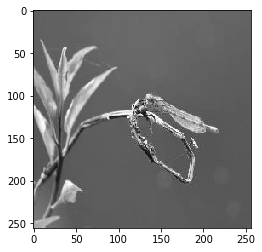

In [19]:
# preds = autoencoder.predict(x_val)

plt.imshow(x_val[2].reshape(256, 256), cmap='gray')

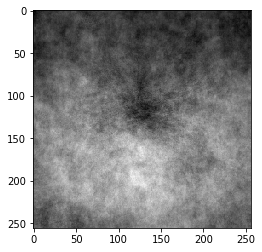

In [18]:
plt.imshow(preds[2].reshape(256, 256), cmap='gray')